In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

% matplotlib inline

In [23]:
Allstatenames = pd.read_csv("C:/Users/tsaig/OneDrive/Documents/00 - Data Sets/US Baby Names/output/StateNames.csv")

In [24]:
# define function to search for similar names
def Name(mask_name):
    Unique_names = Allstatenames.Name.unique()
    mask = np.array([mask_name in x for x in Unique_names])
    names_alike = list(Unique_names[mask])
    filtered = Allstatenames[Allstatenames.Name.isin(names_alike)]
    table = filtered.pivot_table(values = 'Count', index = 'Year', columns = 'Gender', aggfunc = np.sum)
    table = table.div(table.sum(1), axis = 0)
    return table, mask_name

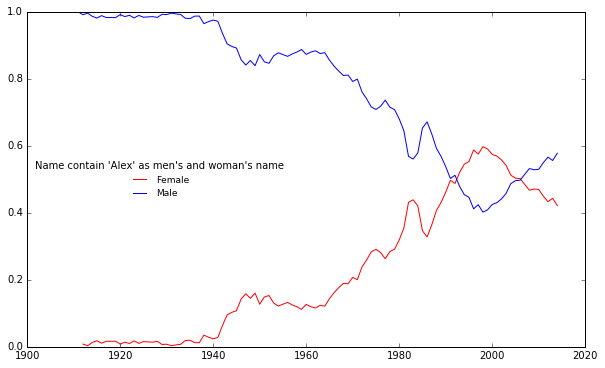

In [25]:
find_name = Name('Alex')
plt.figure (figsize = (10,6))
plt.plot(find_name[0].F, label = 'Female', color = 'red')
plt.plot(find_name[0].M, label = 'Male', color = 'blue')

leg = plt.legend(title = 'Name contain %a as men\'s and woman\'s name' % find_name[1],
                loc = 'best', fontsize = '9')
leg.get_frame().set_linewidth(0.0)

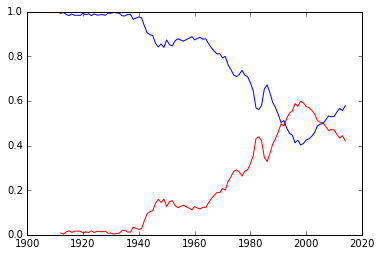

In [26]:
plt.plot(find_name[0].index,find_name[0].F,label='Female',color='red') 
plt.plot(find_name[0].index,find_name[0].M,label='Male',color='blue')